# Projeto de criação de superfícies diferença

## Diogo Ceddia Porto Silva

#### Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from pykdtree.kdtree import KDTree
import time
import matplotlib.pyplot as plt

#### Carregando dados Brutos

In [2]:
# Carregando todos os arquivos BATIMÉTRICOS de todas as resoluções.
data_2018 = pd.read_csv(r"C:\DCPS\IH EHO\Disciplinas_2021\DP - Determinação de Profundidades\Douro_LTH_S11_AN3_201809_DEM30cmPTTM06.txt",
                        skiprows=1,names=['x','y','z'])
data_2019 = pd.read_csv(r"C:\DCPS\IH EHO\Disciplinas_2021\DP - Determinação de Profundidades\Douro_LTH_S11_AN3_201908_DEM30cm_PTTM06.txt",
                        skiprows=1,names=['x','y','z'])
data_2020 = pd.read_csv(r"C:\DCPS\IH EHO\Disciplinas_2021\DP - Determinação de Profundidades\Douro_LTH_S11_AN3_202007_DEM30cmPTTM06.txt",
                        skiprows=1,names=['x','y','z'])

In [3]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20530985 entries, 0 to 20530984
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   x       float64
 1   y       float64
 2   z       float64
dtypes: float64(3)
memory usage: 469.9 MB


In [4]:
data_2018.head()

,x,y,z
0,-45565.35,163101.85,11.052
1,-45565.05,163101.85,11.045
2,-45564.75,163101.85,11.027
3,-45564.45,163101.85,11.017
4,-45564.15,163101.85,11.001


In [5]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20731895 entries, 0 to 20731894
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   x       float64
 1   y       float64
 2   z       float64
dtypes: float64(3)
memory usage: 474.5 MB


In [6]:
data_2019.head()

,x,y,z
0,-45565.95,163101.75,10.670
1,-45565.65,163101.75,10.677
2,-45565.95,163102.05,10.664
3,-45565.65,163102.05,10.672
4,-45565.35,163102.05,10.680


In [7]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20946629 entries, 0 to 20946628
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   x       float64
 1   y       float64
 2   z       float64
dtypes: float64(3)
memory usage: 479.4 MB


In [8]:
data_2020.head()

,x,y,z
0,-45566.1,163102.15,10.530
1,-45565.8,163102.15,10.530
2,-45565.5,163102.15,10.528
3,-45565.2,163102.15,10.523
4,-45564.9,163102.15,10.521


#### k-d-tree

In [9]:
# Pivot é meu dado de 2020.
data = data_2020
data.rename(columns = {'z':'z_2020'}, inplace = True)

In [10]:
# Vizinho mais próximo de 2018.
kd_tree = KDTree(data_2018[['x','y']].values)
start = time.time()
dist, idx = kd_tree.query(data[['x','y']].values, k=1)
end = time.time()
print(end - start)
# Salvando
data['z_2018'] = data_2018.z.iloc[idx].values
data['dist_2018'] = dist

9.0636305809021


In [11]:
# Vizinho mais próximo de 2019.
kd_tree = KDTree(data_2019[['x','y']].values)
start = time.time()
dist, idx = kd_tree.query(data[['x','y']].values, k=1)
end = time.time()
print(end - start)
# Salvando
data['z_2019'] = data_2019.z.iloc[idx].values
data['dist_2019'] = dist

15.959736824035645


In [12]:
data.head()

,x,y,z_2020,z_2018,dist_2018,z_2019,dist_2019
0,-45566.1,163102.15,10.530,11.030,0.540833,10.664,0.180278
1,-45565.8,163102.15,10.530,11.030,0.335410,10.664,0.180278
2,-45565.5,163102.15,10.528,11.034,0.150000,10.680,0.180278
3,-45565.2,163102.15,10.523,11.036,0.150000,10.692,0.180278
4,-45564.9,163102.15,10.521,11.036,0.150000,10.692,0.180278


In [13]:
data.describe()

,x,y,z_2020,z_2018,dist_2018,z_2019,dist_2019
count,2.094663e+07,2.094663e+07,2.094663e+07,2.094663e+07,2.094663e+07,2.094663e+07,2.094663e+07
mean,-4.537626e+04,1.638447e+05,3.464047e+00,3.428192e+00,4.965093e-01,3.447882e+00,3.526912e-01
std,4.714819e+02,4.248002e+02,6.800809e+00,6.776568e+00,3.068371e+00,6.824635e+00,1.919346e+00
min,-4.665300e+04,1.631021e+05,-2.796900e+01,-2.837500e+01,1.500000e-01,-2.845200e+01,1.802776e-01
25%,-4.573560e+04,1.634895e+05,-2.222000e+00,-2.517000e+00,1.500000e-01,-2.650000e+00,1.802776e-01
50%,-4.538460e+04,1.638180e+05,5.838000e+00,5.619000e+00,1.500000e-01,5.716000e+00,1.802776e-01
75%,-4.500750e+04,1.641986e+05,8.757000e+00,8.702000e+00,1.500000e-01,8.740000e+00,1.802776e-01
max,-4.430490e+04,1.646754e+05,1.424000e+01,1.438800e+01,6.869427e+01,1.404600e+01,5.656070e+01


#### Filtrando tudo que dista 20cm+ do grid pivot.

In [14]:
i = len(data)
print(f'Tamanho inicial: {i}')
data = data.reset_index(drop=True)
data = data.drop(np.where(data.dist_2018>0.2)[0]).reset_index(drop=True)
data = data.drop(np.where(data.dist_2019>0.2)[0]).reset_index(drop=True)
f = len(data)
print(f'Tamanho final: {f}')
print(f'Diminuição percentual: {np.round(100-((f*100)/i),3)}%')

Tamanho inicial: 20946629
Tamanho final: 20334390
Diminuição percentual: 2.923%


#### Calculando diferenças

In [15]:
data['diff_2020-2018'] = data.z_2020 - data.z_2018
data['diff_2020-2019'] = data.z_2020 - data.z_2019
data['diff_2019-2018'] = data.z_2019 - data.z_2018

In [16]:
data['diff_2020-2018'] = np.round(data['diff_2020-2018'],3)
data['diff_2020-2019'] = np.round(data['diff_2020-2019'],3)
data['diff_2019-2018'] = np.round(data['diff_2019-2018'],3)

In [17]:
data.head()

,x,y,z_2020,z_2018,dist_2018,z_2019,dist_2019,diff_2020-2018,diff_2020-2019,diff_2019-2018
0,-45565.5,163102.15,10.528,11.034,0.15,10.680,0.180278,-0.506,-0.152,-0.354
1,-45565.2,163102.15,10.523,11.036,0.15,10.692,0.180278,-0.513,-0.169,-0.344
2,-45564.9,163102.15,10.521,11.036,0.15,10.692,0.180278,-0.515,-0.171,-0.344
3,-45564.6,163102.15,10.519,11.018,0.15,10.712,0.180278,-0.499,-0.193,-0.306
4,-45564.3,163102.15,10.510,11.018,0.15,10.740,0.180278,-0.508,-0.230,-0.278


In [18]:
data.describe()

,x,y,z_2020,z_2018,dist_2018,z_2019,dist_2019,diff_2020-2018,diff_2020-2019,diff_2019-2018
count,2.033439e+07,2.033439e+07,2.033439e+07,2.033439e+07,2.033439e+07,2.033439e+07,2.033439e+07,2.033439e+07,2.033439e+07,2.033439e+07
mean,-4.537682e+04,1.638385e+05,3.544751e+00,3.518198e+00,1.500000e-01,3.536027e+00,1.802776e-01,2.655360e-02,8.723958e-03,1.782964e-02
std,4.738606e+02,4.195298e+02,6.873476e+00,6.835897e+00,5.418177e-11,6.887427e+00,3.751953e-11,5.936900e-01,5.440255e-01,5.194465e-01
min,-4.665270e+04,1.631021e+05,-2.796900e+01,-2.837500e+01,1.500000e-01,-2.845200e+01,1.802776e-01,-1.168300e+01,-1.179700e+01,-1.324700e+01
25%,-4.573770e+04,1.634885e+05,-2.534000e+00,-2.670000e+00,1.500000e-01,-2.858000e+00,1.802776e-01,-1.780000e-01,-1.660000e-01,-1.060000e-01
50%,-4.538400e+04,1.638084e+05,5.969000e+00,5.773000e+00,1.500000e-01,5.870000e+00,1.802776e-01,3.200000e-02,1.600000e-02,3.800000e-02
75%,-4.500480e+04,1.641851e+05,8.853000e+00,8.802000e+00,1.500000e-01,8.860000e+00,1.802776e-01,2.370000e-01,2.080000e-01,1.550000e-01
max,-4.431240e+04,1.646754e+05,1.424000e+01,1.438000e+01,1.500000e-01,1.404600e+01,1.802776e-01,1.298100e+01,1.183700e+01,1.480900e+01


#### Estatística

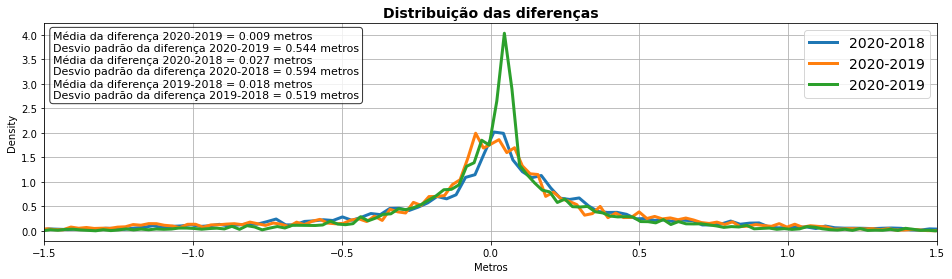

In [19]:
data['diff_2020-2018'].sample(frac=1).reset_index(drop=True)[:100000].plot.kde(figsize=(16,4),
                                                                             bw_method=0.001,
                                                                             label='2020-2018',
                                                                             linewidth=3)
data['diff_2020-2019'].sample(frac=1).reset_index(drop=True)[:100000].plot.kde(figsize=(16,4),
                                                                             bw_method=0.001,
                                                                             label='2020-2019',
                                                                             linewidth=3)
data['diff_2019-2018'].sample(frac=1).reset_index(drop=True)[:100000].plot.kde(figsize=(16,4),
                                                                             bw_method=0.001,
                                                                             label='2020-2019',
                                                                             linewidth=3)

m_2020_2019 = np.round(data['diff_2020-2019'].mean(),3)
std_2020_2019  = np.round(data['diff_2020-2019'].std(),3)
m_2020_2018 = np.round(data['diff_2020-2018'].mean(),3)
std_2020_2018  = np.round(data['diff_2020-2018'].std(),3)
m_2019_2018 = np.round(data['diff_2019-2018'].mean(),3)
std_2019_2018  = np.round(data['diff_2019-2018'].std(),3)

text = f"Média da diferença 2020-2019 = {m_2020_2019} metros\nDesvio padrão da diferença 2020-2019 = {std_2020_2019} metros\nMédia da diferença 2020-2018 = {m_2020_2018} metros\nDesvio padrão da diferença 2020-2018 = {std_2020_2018} metros\nMédia da diferença 2019-2018 = {m_2019_2018} metros\nDesvio padrão da diferença 2019-2018 = {std_2019_2018} metros"
plt.text(0.01,
     0.655,
     text,
     transform=plt.gca().transAxes,
         fontsize=11,
     bbox=dict(facecolor='white',alpha=0.8,edgecolor='black',boxstyle='round'))

plt.title('Distribuição das diferenças',fontweight='bold',fontsize=14)
#plt.xlim(mean-3*std,mean+3*std)
plt.xlim(-1.5,1.5)
plt.xlabel('Metros')
plt.legend(fontsize=14)
plt.grid()

#### Salvando

In [20]:
## Diff_2020-2018
#data[['x','y','diff_2020-2018']].to_csv(r"C:\DCPS\IH EHO\Disciplinas_2021\DP - Determinação de Profundidades\diff_2020-2018.txt",
#                                   index=False,header=True)
# Diff_2020-2019
#data[['x','y','diff_2020-2019']].to_csv(r"C:\DCPS\IH EHO\Disciplinas_2021\DP - Determinação de Profundidades\diff_2020-2019.txt",
#                                   index=False,header=True)
# Diff_2019-2018
#data[['x','y','diff_2019-2018']].to_csv(r"C:\DCPS\IH EHO\Disciplinas_2021\DP - Determinação de Profundidades\diff_2019-2018.txt",
#                                   index=False,header=True)